#Quick Draw dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
root="/gdrive/MyDrive/ese8/"

In [ ]:
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pool.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/basket.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hamburger.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helmet.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/key.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/lion.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mug.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/oven.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/panda.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pizza.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pig.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/face.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/horse.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ice%20cream.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/moon.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/microphone.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/onion.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pillow.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/potato.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pond.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy
!wget -nc https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy



--2024-06-01 14:01:26--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 108.177.120.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130307152 (124M) [application/octet-stream]
Saving to: ‘bus.npy’

bus.npy             100%[===================>] 124.27M   183MB/s    in 0.7s    

2024-06-01 14:01:27 (183 MB/s) - ‘bus.npy’ saved [130307152/130307152]

--2024-06-01 14:01:27--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pool.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 108.177.120.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104616256 (100M) [application/octet-stream]


In [ ]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torch.utils.data as tu
import torchvision
from torchvision import datasets, models, transforms
import time
import copy
import pandas as pd
from tqdm import tqdm
from PIL import Image
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import gc

#Some images


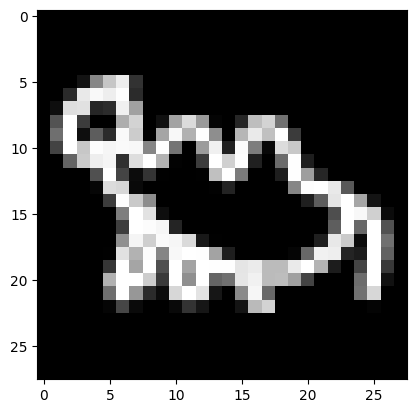

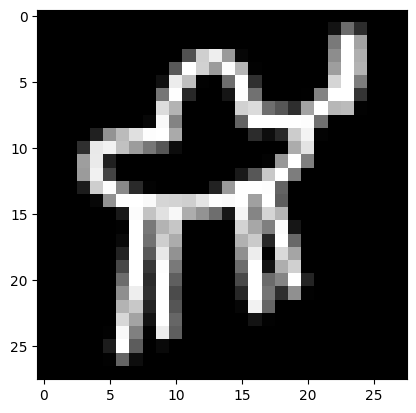

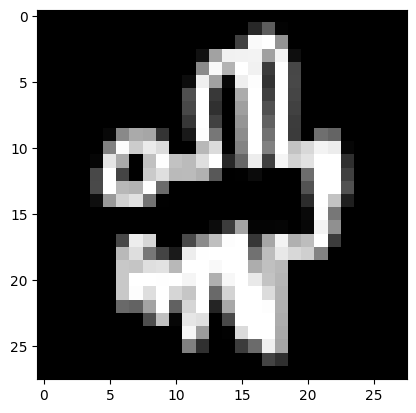

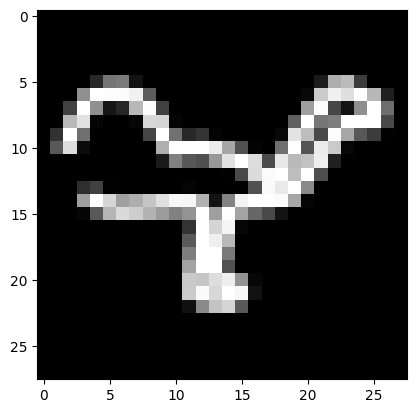

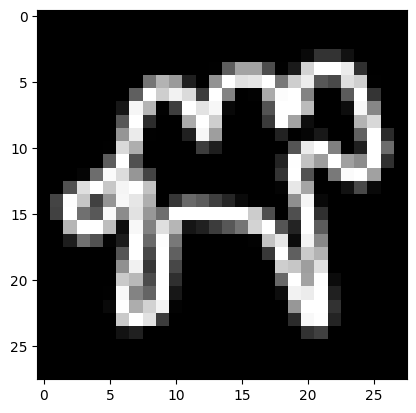

In [ ]:
data = np.load("camel.npy")
for i in range(5):
  plt.imshow(data[i].reshape(28, 28),cmap='gray')
  plt.show()

In [ ]:
def load_images(name):
    data = np.load(name)
    data = data.astype(np.float64) / 255.0 #normalizzo
    if data.ndim == 2 and data.shape[1] == 784:
      num_images, img_size = data.shape
      data = data.reshape(num_images, 28, 28)
    elif data.ndim == 1:
    # Supponiamo RGB
      num_images = data.shape[0] // (28 * 28 * 3)
      data = data.reshape(num_images, 28, 28, 3)  # Reshape RGB
    data = np.stack([data, data, data], axis=3)
    return data

os.makedirs("data", exist_ok=True)



In [ ]:
#Carica e organizza le immagini scaricate in formato NumPy
data_dir="data"
for f in os.listdir():
  if f.endswith(".npy"):
    name = f.split(".")[0]
    # Create directory for the class (if it doesn't exist)
    os.makedirs(os.path.join(data_dir, name), exist_ok=True)
    # Load the entire data array
    data = load_images(f)[:10000]
    for i, img in enumerate(data):
          np.save(os.path.join(data_dir, name, f"{i}.npy"), img)

(28, 28, 3)


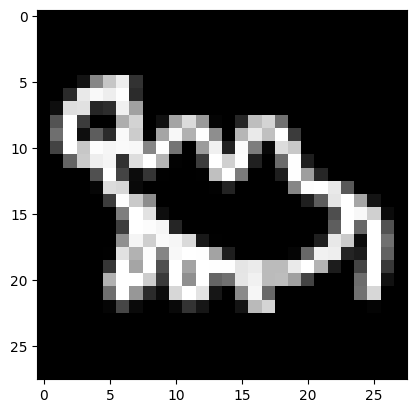

In [ ]:
data = np.load("data/camel/0.npy")
print(data.shape)
#data = data.reshape(28, 28, 3)
plt.imshow(data)
plt.show()

carico il dataset

In [ ]:
class MyDataSet(torch.utils.data.Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir=root_dir
    self.transform=transform
    self.classi=os.listdir(root_dir) #copio i nomi delle cartelle (ovvero le classi che ho scelto)
    self.data = []
    self.labels = []
    for cl in self.classi:
      for f in os.listdir(os.path.join(root_dir, cl)):
        if f.endswith(".npy"):
          image = np.load(os.path.join(root_dir, cl, f))
          image = image.transpose(1, 0, 2)
          self.data.append(image)
          self.labels.append(self.classi.index(cl))

  def __len__(self):
        return len(self.data)

  def __getitem__(self, indx):
      image = self.data[indx]
      label = self.labels[indx]
      if self.transform is not None:
          image = self.transform(image)
      return image, label


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


applichiamo RandomHorizontalFlip e RandomResizedCrop per migliorare la robustezza del modello

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [ ]:
dataset = MyDataSet("data", transform=transform)

torch.Size([3, 224, 224])


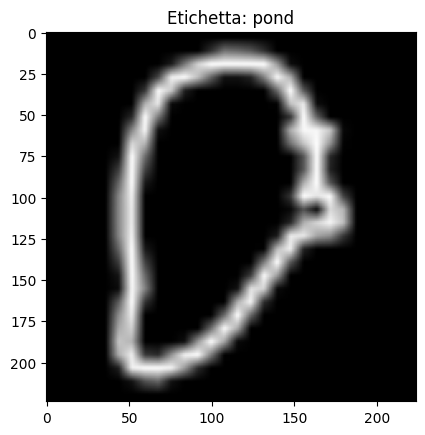

torch.Size([3, 224, 224])


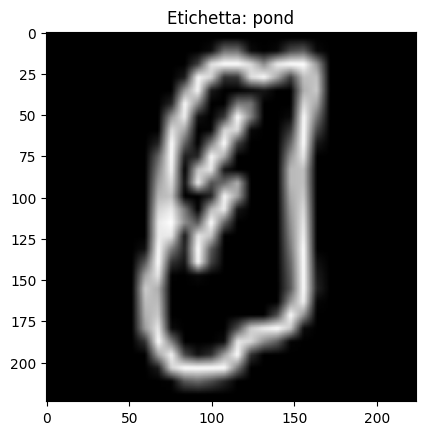

torch.Size([3, 224, 224])


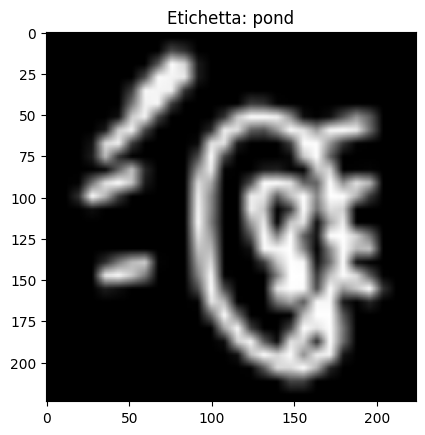

torch.Size([3, 224, 224])


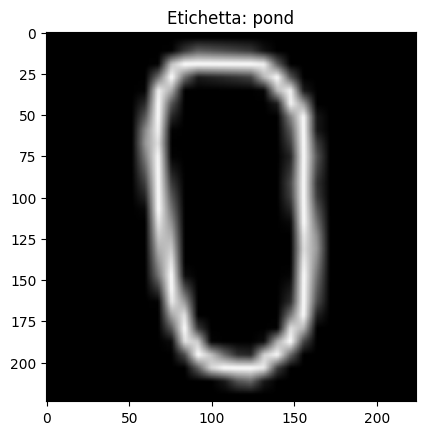

torch.Size([3, 224, 224])


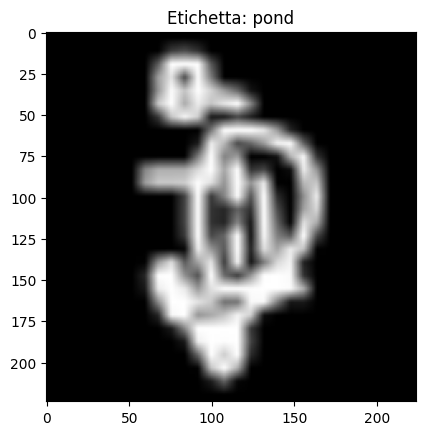

In [ ]:
for i in range(5):

    immagine, etichetta = dataset[i]
    print(immagine.shape)
    immagine = immagine.permute((1, 2, 0))
    plt.imshow(immagine)
    plt.title(f'Etichetta: {dataset.classi[etichetta]}')
    plt.show()

In [ ]:
train_set, val_set, test_set = tu.random_split(dataset, [0.7, 0.1, 0.2])

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


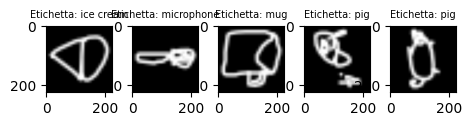

In [ ]:
for i in range(5):
    image, label = train_set[i]
    plt.subplot(3, 6, i + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    image = image.permute((1, 2, 0))
    plt.imshow(image)
    plt.title(f"Etichetta: {dataset.classi[label]}", fontsize=7)
plt.show()

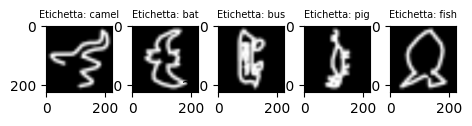

In [ ]:
for i in range(5):
    image, label = val_set[i]
    plt.subplot(3, 6, i + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    image = image.permute((1, 2, 0))
    plt.imshow(image)
    plt.title(f"Etichetta: {dataset.classi[label]}", fontsize=7)
plt.show()

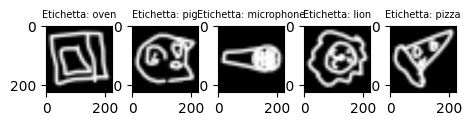

In [ ]:
for i in range(5):
    image, label = test_set[i]
    plt.subplot(3, 6, i + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    image = image.permute((1, 2, 0))
    plt.imshow(image)
    plt.title(f"Etichetta: {dataset.classi[label]}", fontsize=7)
plt.show()

<class 'torch.Tensor'>
torch.Size([2000, 3, 224, 224])
torch.Size([2000])


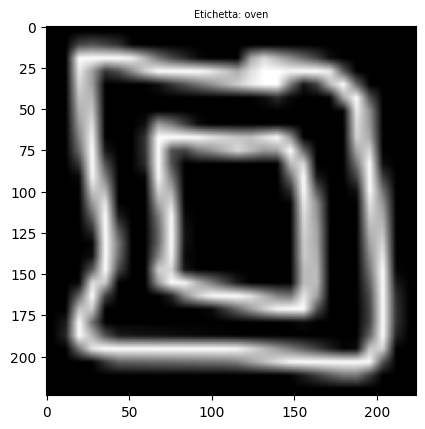

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming train_loader is defined and initialized
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(type(images))  # Should print: <class 'torch.Tensor'>
print(images.shape)  # Expected shape: (batch_size, 3, 224, 224)
print(labels.shape)  # Expected shape: (batch_size,)

# Convert the first image tensor to a NumPy array
image_np = images[0].numpy()

# Permute the dimensions to (height, width, channels) for matplotlib
image_np = image_np.transpose((1, 2, 0))

# Convert from Tensor to NumPy array
label = labels[0].item()

# Assuming dataset.classi is a list of class names
# Ensure dataset.classi is defined
class_names = dataset.classi  # Replace with actual class names list

# Display the image
plt.imshow(image_np)
plt.title(f"Etichetta: {class_names[label]}", fontsize=7)
plt.show()

# Train, Validation and Test

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
def train(model, device, optimizer, loss_fn, epochs, train_loader, val_loader, trial, validate_filename, lr, bt, log_interval=2000,):
    # Set model to train mode
    model.train()
    train_losses = []
    train_acc = []
    best_loss = float('inf')
    best_model_state_dict = None
    save_path=root+'model_'+str(trial)+'_'+str(lr)+'_'+str(bt)+'.pt'
    # Training loop
    for epoch in  range(epochs):
      total_loss = 0
      accuracy = 0
      for batch_idx, (data, target) in enumerate(train_loader):
           data, target = data.to(device, dtype=torch.float64), target.to(device)
           data = F.interpolate(data, size=(224, 224), mode='bilinear', align_corners=False)

           # Trasforma l'ordine dei canali da RGB a BGR
           data = data[:, [2, 1, 0], :, :]

           optimizer.zero_grad()
           output = model(data)
           loss = loss_fn(output, target)
           loss.backward()
           optimizer.step()
           total_loss += loss.item()
           pred = output.argmax(dim=1, keepdim=True) #argmax calcola l'indice dell'elemento con il valore massimo sull'asse 1
           accuracy += pred.eq(target.view_as(pred)).sum().item()
           #if batch_idx % log_interval == 0:
           print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch+1,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item()
            ))

      train_losses.append(total_loss / len(train_loader.dataset))
      train_acc.append(accuracy / len(train_loader.dataset))

      val_loss, val_acc = validate(model, device, loss_fn, val_loader)

      if val_loss < best_loss:
        best_loss = val_loss
        best_model_state_dict = model.state_dict()
        print("salvataggio modello \n")
        torch.save({'model_state_dict':best_model_state_dict,
                'optimizer_state_dict': optimizer.state_dict(),
                'best_val_loss': best_loss,
                'epoca':epoch
        }, save_path)
        print("salvataggio avvenuto \n")


      with open(validate_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([trial + 1, epoch + 1, val_loss, val_acc])


    return train_losses, train_acc

In [ ]:
def validate(model, device, loss_fn, validation_loader):
    model.eval()
    val_loss, correct = 0, 0
    # Disabilito il calcolo del gradiente per velocizzare
    with torch.no_grad():
        # Loop over each batch from the validation set
        for data, target in validation_loader:
            data, target = data.to(device, dtype=torch.float64), target.to(device)
            data = F.interpolate(data, size=(224, 224), mode='bilinear', align_corners=False)

            # Trasforma l'ordine dei canali da RGB a BGR
            data = data[:, [2, 1, 0], :, :]
            # Calcolo output usando i dati come input per la rete
            output = model(data)
            # Calcolo loss usando criterion
            val_loss += loss_fn(output, target).item()
            # Calcolo accuratezza
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calcola la media della loss e dell'accuratezza sul set di validazione
    val_loss /= len(validation_loader.dataset)
    accuracy = 100. * correct / len(validation_loader.dataset)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(val_loss, correct, len(validation_loader.dataset), accuracy))
    return val_loss, accuracy

In [ ]:
def test(model, device, loss_fn, test_loader):
  total_loss = 0
  accuracy = 0
  y_true = []
  y_pred = []
  model.eval()  # Assicurati che il modello sia in modalità valutazione
  with torch.no_grad():  # Disabilita il calcolo del gradiente
        for data, target in test_loader:
            data, target = data.to(device, dtype=torch.float), target.to(device)
            data = F.interpolate(data, size=(224, 224), mode='bilinear', align_corners=False)

            # Trasforma l'ordine dei canali da RGB a BGR
            data = data[:, [2, 1, 0], :, :]
            output = model(data)
            loss = loss_fn(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            accuracy += pred.eq(target.view_as(pred)).sum().item()

            y_true.extend(target.cpu().numpy())
            y_pred.extend(pred.squeeze().cpu().numpy())

  print(y_true[:10])
  print(y_pred[:10])
  # Calcolo metriche
  average_loss = total_loss / len(test_loader.dataset)
  accuracy = accuracy / len(test_loader.dataset)
  precision, recall, f1_score,s = precision_recall_fscore_support(y_true, y_pred, average="macro")
  print(f"- average_loss: {average_loss:.4f}")
  print(f"- accuracy: {accuracy:.4f}")
  print(f"- F1-score: {f1_score:.4f}")
  print(f"- Precisione: {precision:.4f}")
  print(f"- Richiamo: {recall:.4f}")
  print("\n\n")


  return average_loss, accuracy, f1_score, precision, recall

In [ ]:
import random
import csv

# Definizione degli intervalli per gli iperparametri
batch_sizes = [2000, 1000, 500]
learning_rates = [1e-2, 1e-3,1e-4]

# Numero di iterazioni di esplorazione
num_trials = 7

# Numero di epoche
num_epochs = 10

# Nome del file dove salvare i risultati
results_filename = root+'training_results_detailed.csv'
validate_filename = root+'validate_result.csv'

# Inizializzazione delle variabili per tenere traccia del miglior modello
best_val_accuracy = 0.0
best_model_state_dict = None

# Preparazione del file CSV e scrittura dell'intestazione
with open(results_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Trial', 'Epoch', 'Batch Size', 'Learning Rate', 'Train Loss', 'Train Accuracy'])

with open(validate_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Trial', 'Epoch', 'Validation Loss', 'Validation Accuracy'])

# Loop per l'esplorazione randomica
for trial in range(num_trials):
    # Scelta random degli iperparametri
    batch_size = random.choice(batch_sizes)
    learning_rate = random.choice(learning_rates)

    print(f"Trial {trial+1}/{num_trials}: batch_size={batch_size}, learning_rate={learning_rate}")

    # Re-inizializzazione dei DataLoader con il nuovo batch_size
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
    validation_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)

    # Re-inizializzazione del modello e dell'ottimizzatore
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classi))
    model = model.to(device, dtype=torch.float64)

    optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)


    train_losses, train_acc = train(model, device, optimizer, criterion, num_epochs, train_loader, validation_loader, trial, validate_filename,learning_rate,batch_size)

    del model
    del optimizer
    gc.collect()
    torch.cuda.empty_cache()


    # Salvataggio dei risultati per ogni epoca per ogni trial
    with open(results_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        for epoch in range(num_epochs):
            writer.writerow([trial + 1, epoch + 1, batch_size, learning_rate, train_losses[epoch], train_acc[epoch]])

#Accuracy and Loss for different lr and batch size

In [ ]:
# Risultati salvati nel file csv

# Carica i dati dal file CSV
file_path = root+'training_results_detailed.csv'
df = pd.read_csv(file_path)
file_path = root+'validate_result.csv'
dv=pd.read_csv(file_path)


print(df.head())
print(dv.head())

   Trial  Epoch  Batch Size  Learning Rate  Train Loss  Train Accuracy
0      1      1         500           0.01    0.002726        0.612933
1      1      2         500           0.01    0.002313        0.661086
2      1      3         500           0.01    0.002276        0.667876
3      1      4         500           0.01    0.002304        0.665114
4      1      5         500           0.01    0.002262        0.669752
   Trial  Epoch  Validation Loss  Validation Accuracy
0      1      1         0.002331            66.033333
1      1      2         0.002280            66.823333
2      1      3         0.002325            65.970000
3      1      4         0.002281            67.313333
4      1      5         0.002283            67.296667


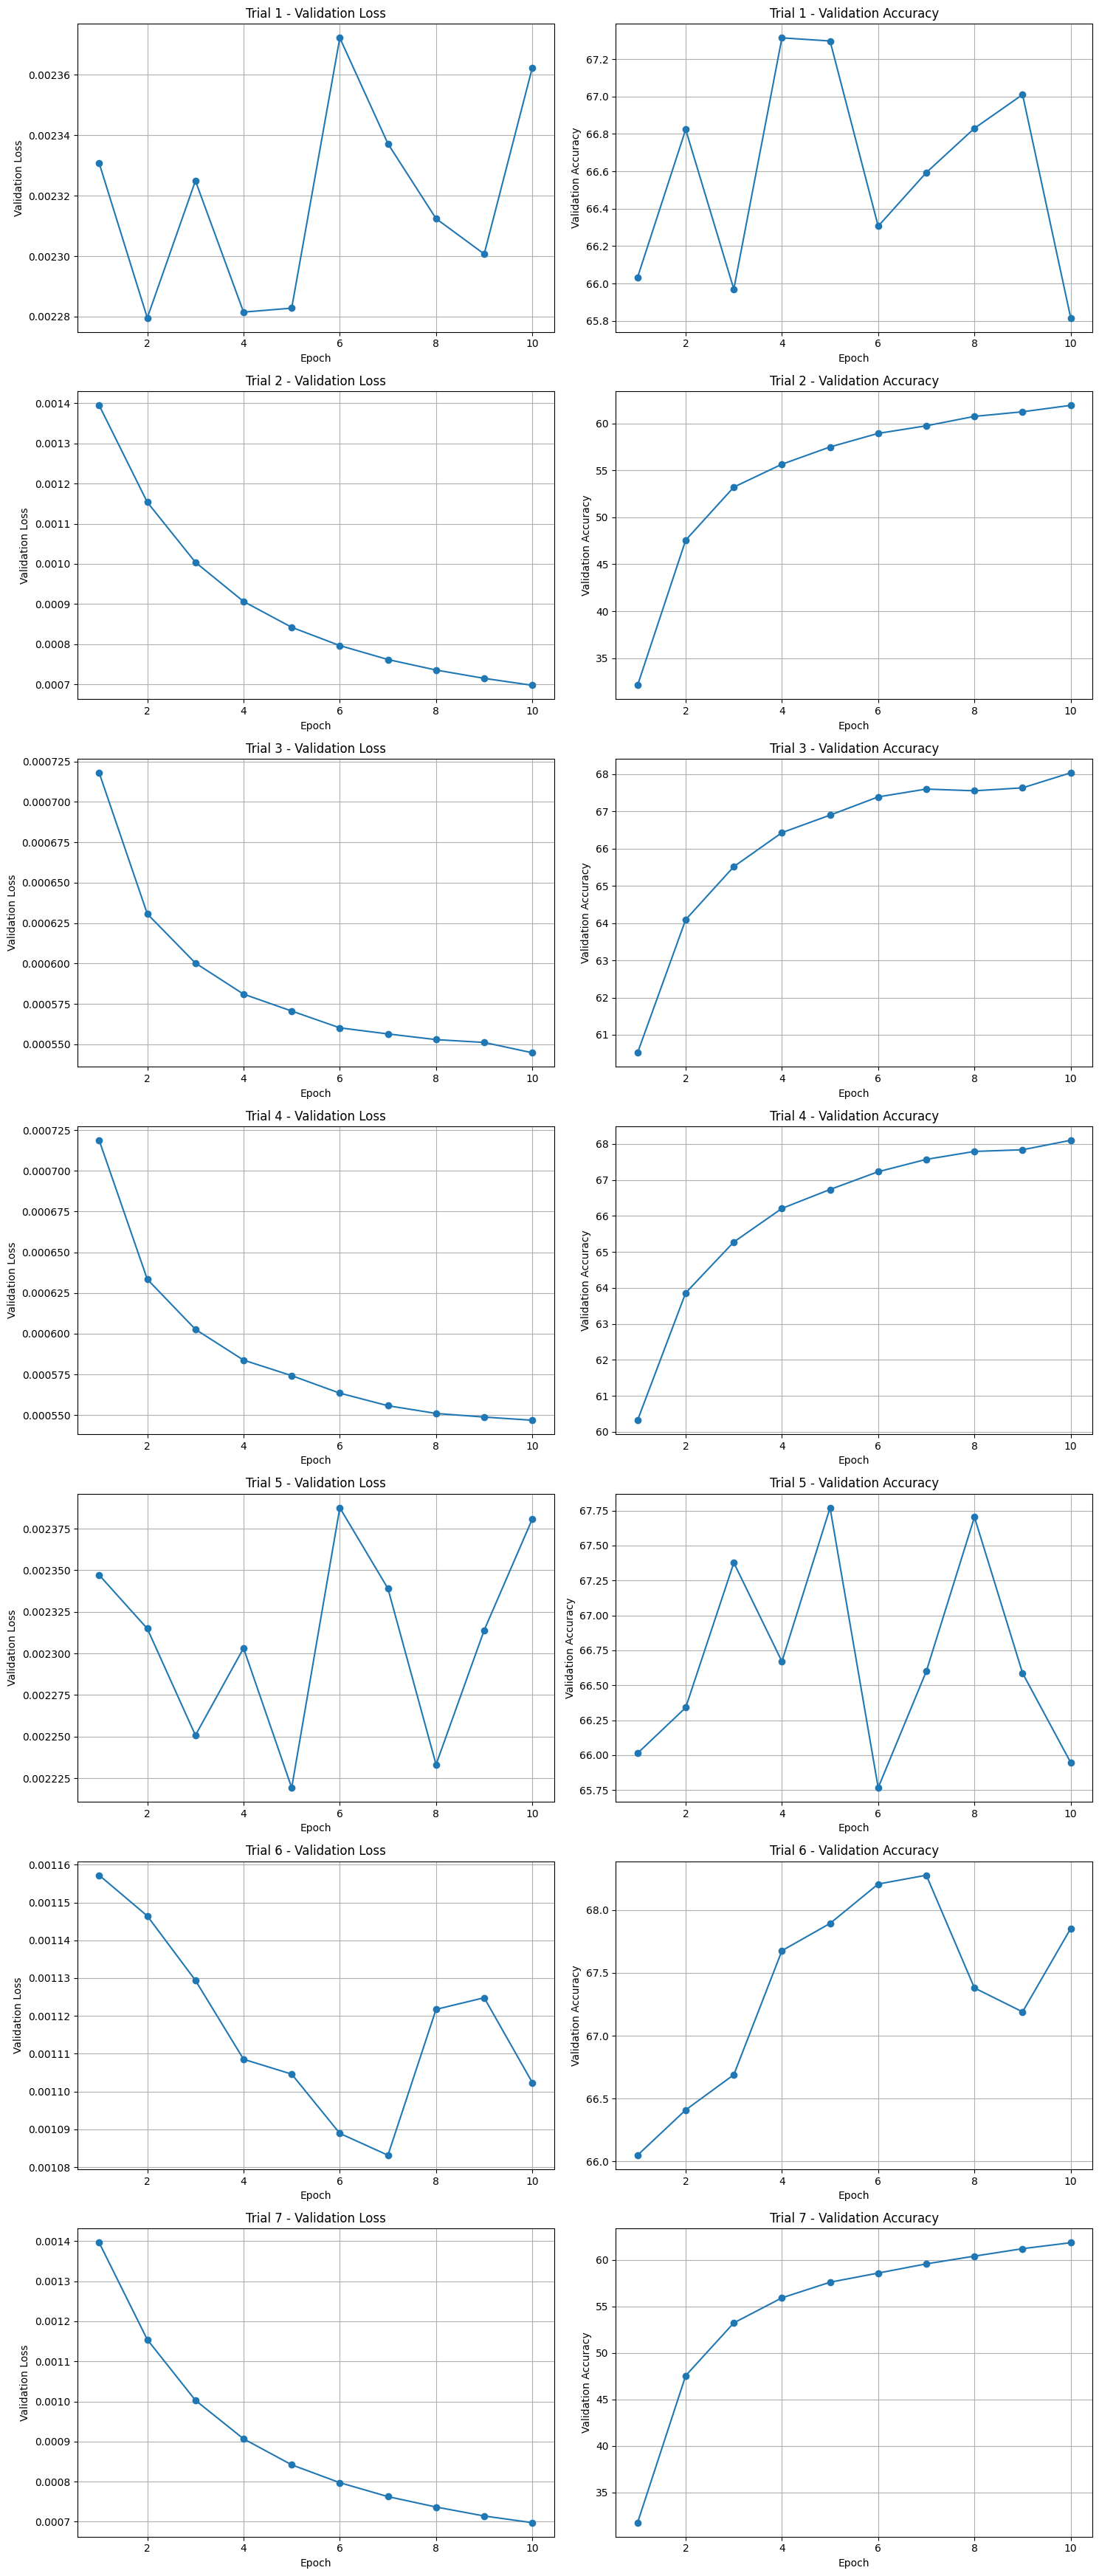

In [ ]:
num_trials = dv['Trial'].max()
plt.figure(figsize=(15, 5*num_trials))

# Grafici per ogni trial
for trial in range(1, num_trials + 1):
    # Seleziona i dati corrispondenti al trial corrente
    trial_data = dv[dv['Trial'] == trial]

    # Grafico della perdita di validazione
    plt.subplot(num_trials, 2, trial*2-1)
    plt.plot(trial_data['Epoch'], trial_data['Validation Loss'], marker='o')
    plt.title(f'Trial {trial} - Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.grid(True)

    # Grafico dell'accuratezza di validazione
    plt.subplot(num_trials, 2, trial*2)
    plt.plot(trial_data['Epoch'], trial_data['Validation Accuracy'], marker='o')
    plt.title(f'Trial {trial} - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)

plt.tight_layout()
plt.show()

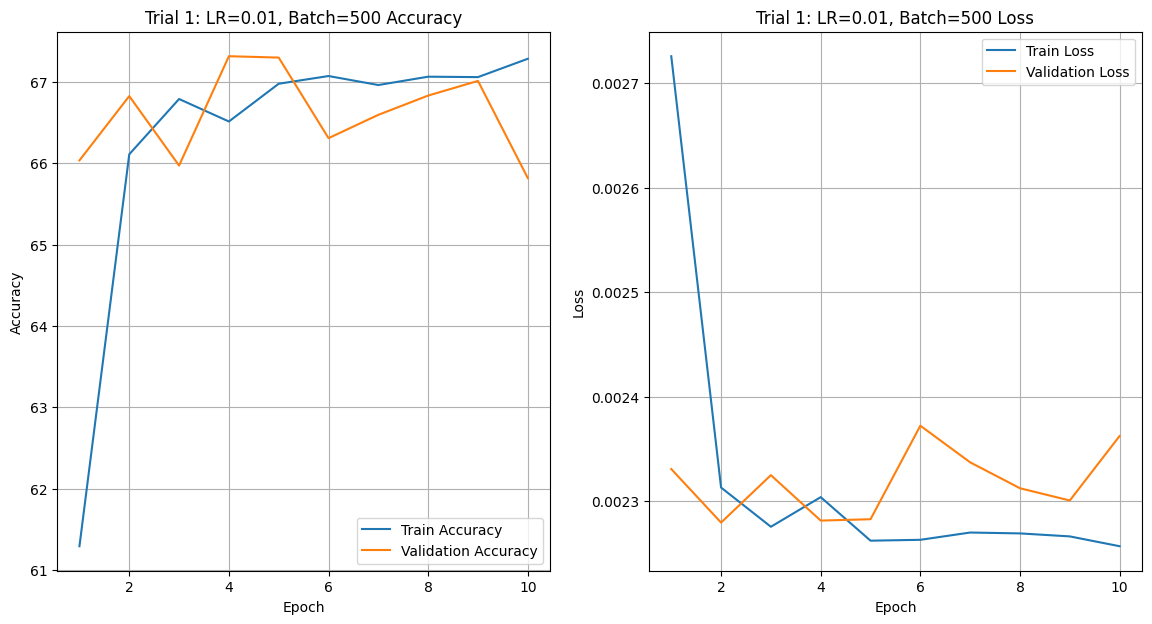

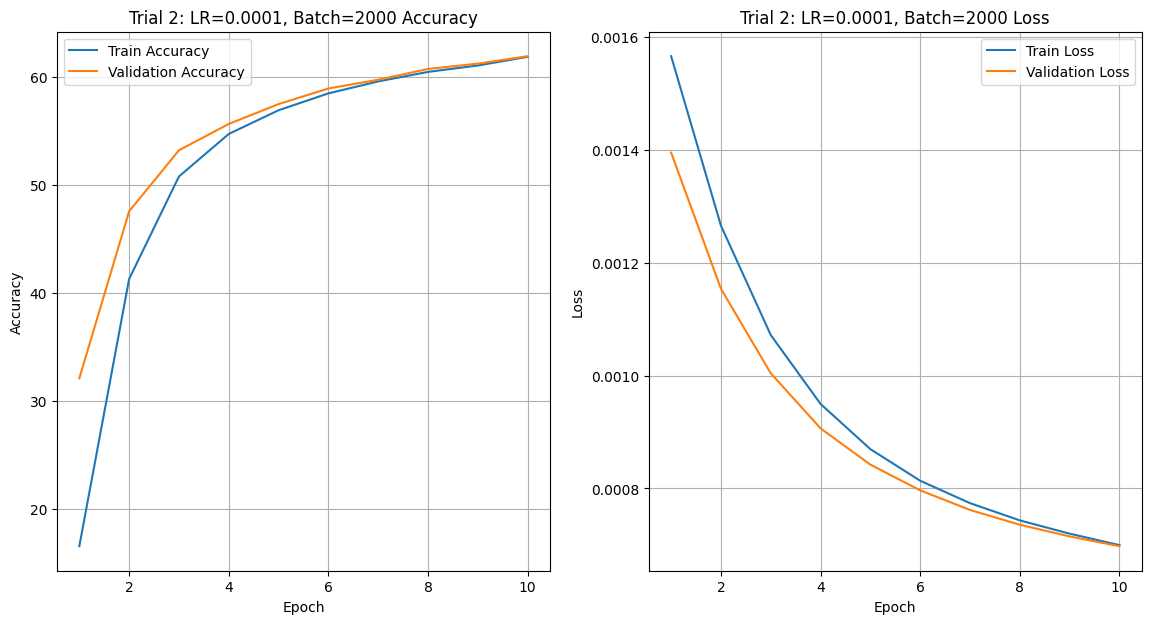

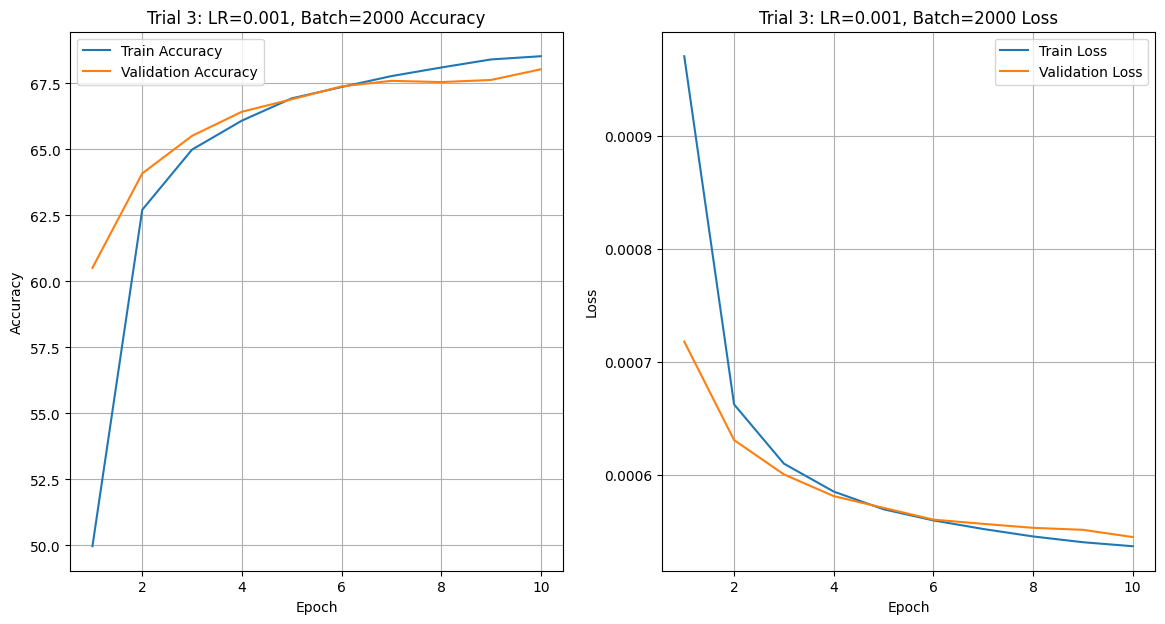

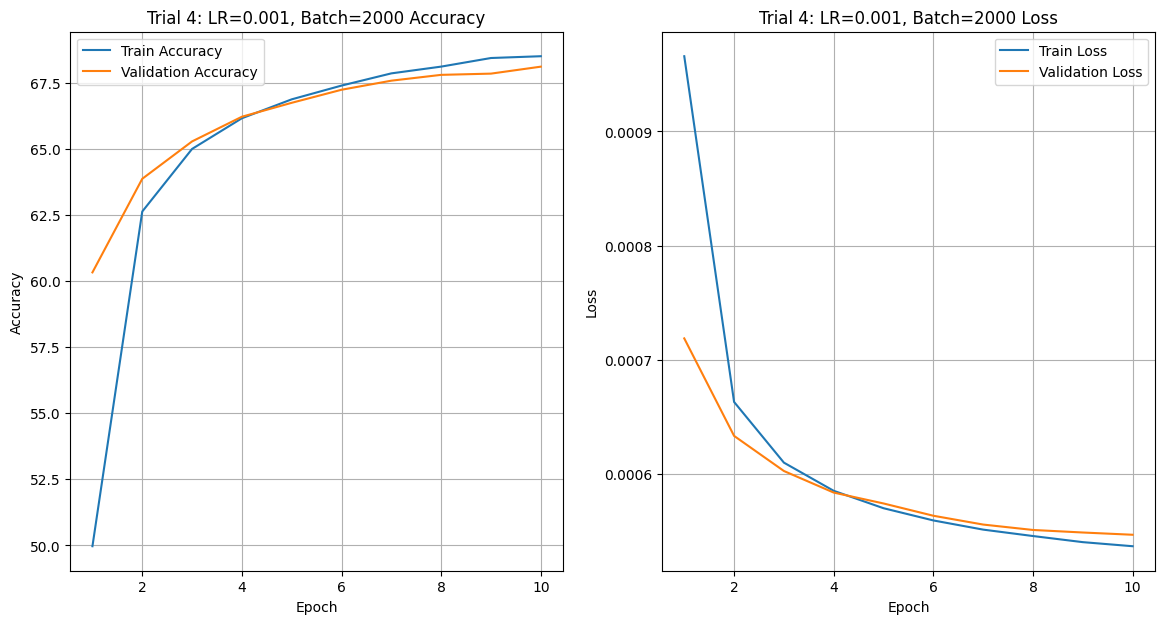

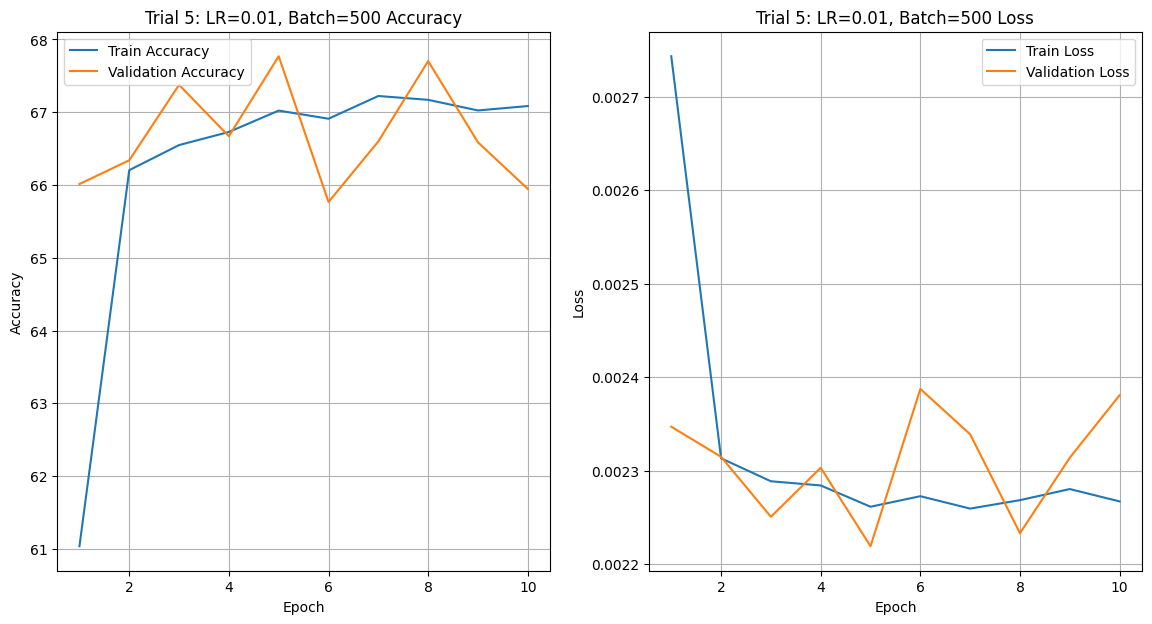

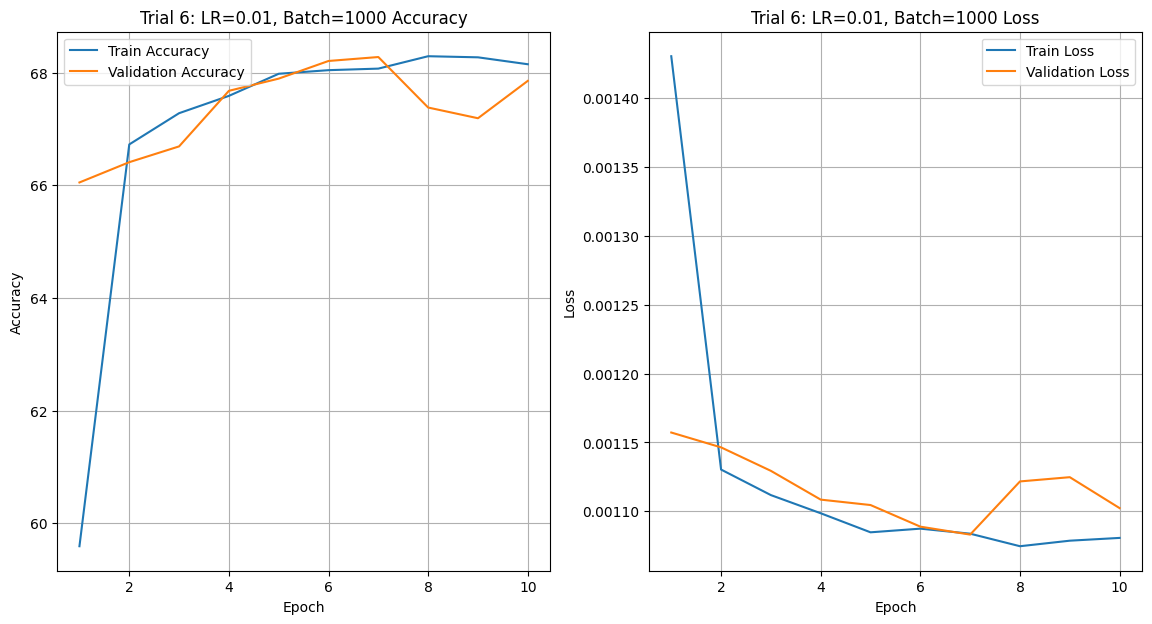

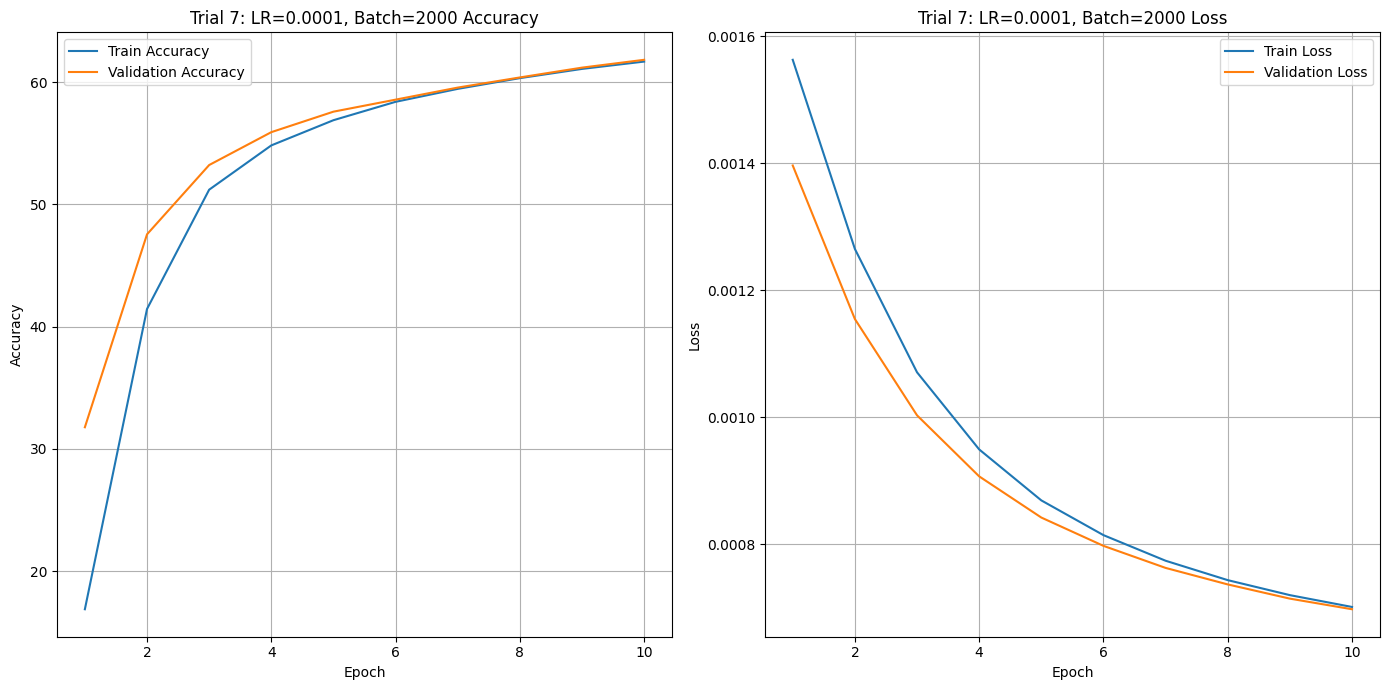

In [ ]:
num_trials = dv['Trial'].nunique()

for trial in range(1, num_trials + 1):
    # Filtra i dati per il trial corrente
    val_trial_data = dv[dv['Trial'] == trial]
    train_trial_data = df[df['Trial'] == trial]

    learning_rate = train_trial_data['Learning Rate'].iloc[0]
    batch_size = train_trial_data['Batch Size'].iloc[0]

    # Grafico dell'accuracy
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.plot(train_trial_data['Epoch'], train_trial_data['Train Accuracy']*100, label='Train Accuracy')
    plt.plot(val_trial_data['Epoch'], val_trial_data['Validation Accuracy'], label='Validation Accuracy')
    plt.title(f'Trial {trial}: LR={learning_rate}, Batch={batch_size} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Grafico della loss
    plt.subplot(1, 2, 2)
    plt.plot(train_trial_data['Epoch'], train_trial_data['Train Loss'], label='Train Loss')
    plt.plot(val_trial_data['Epoch'], val_trial_data['Validation Loss'], label='Validation Loss')
    plt.title(f'Trial {trial}: LR={learning_rate}, Batch={batch_size} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Salva il grafico
plt.tight_layout()
plt.show()


In [ ]:
import csv
test_filename = root+'test_result.csv'
with open(test_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Trial','Batch Size', 'Learning Rate',  'Test Loss', 'Test Accuracy', 'F1-score', 'Recall', 'Precision'])

#5 modelli resnet18
num_classes = 30  # Assicurati che il numero di classi sia lo stesso del modello originale


model1 = models.resnet18(pretrained=False)
num_ftrs = model1.fc.in_features
model1.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint1 = torch.load(root+'model_0_0.01_500.pt')
model1.load_state_dict(checkpoint1['model_state_dict'])

#trail 1
test_loader = DataLoader(test_set, batch_size=500, shuffle=False, num_workers=2)
model1.to(device)
test_loss, test_acc, f1_score, precision, recall = test(model1, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([1, 500, 0.01, test_loss, test_acc, f1_score, recall, precision])

del model1
gc.collect()
torch.cuda.empty_cache()



model2 = models.resnet18(pretrained=False)
model2.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint2 = torch.load(root+'model_1_0.0001_2000.pt')
model2.load_state_dict(checkpoint2['model_state_dict'])

#trial 2
test_loader = DataLoader(test_set, batch_size=2000, shuffle=False, num_workers=2)
model2.to(device)
test_loss, test_acc, f1_score, precision, recall= test(model2, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([2, 2000, 0.0001, test_loss, test_acc, f1_score, recall, precision])

del model2
gc.collect()
torch.cuda.empty_cache()

model3 = models.resnet18(pretrained=False)
model3.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint3 = torch.load(root+'model_2_0.001_2000.pt')
model3.load_state_dict(checkpoint3['model_state_dict'])

#trial 3
test_loader = DataLoader(test_set, batch_size=2000, shuffle=False, num_workers=2)
model3.to(device)
test_loss, test_acc, f1_score, precision, recall= test(model3, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([3, 2000, 0.001, test_loss, test_acc, f1_score, recall, precision])

del model3
gc.collect()
torch.cuda.empty_cache()

model4 = models.resnet18(pretrained=False)
model4.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint4 = torch.load(root+'model_3_0.001_2000.pt')
model4.load_state_dict(checkpoint4['model_state_dict'])


#trial 4
test_loader = DataLoader(test_set, batch_size=2000, shuffle=False, num_workers=2)
model4.to(device)
test_loss, test_acc, f1_score, precision, recall = test(model4, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([4, 2000, 0.0001, test_loss, test_acc, f1_score, recall, precision])

del model4
gc.collect()
torch.cuda.empty_cache()

model5 = models.resnet18(pretrained=False)
model5.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint5 = torch.load(root+'model_4_0.01_500.pt')
model5.load_state_dict(checkpoint5['model_state_dict'])

#trial 5
test_loader = DataLoader(test_set, batch_size=500, shuffle=False, num_workers=2)
model5.to(device)
test_loss, test_acc, f1_score, precision, recall= test(model5, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([5, 500, 0.01, test_loss, test_acc, f1_score, recall, precision])


del model5
gc.collect()
torch.cuda.empty_cache()


model6 = models.resnet18(pretrained=False)
model6.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint6 = torch.load(root+'model_5_0.01_1000.pt')
model6.load_state_dict(checkpoint6['model_state_dict'])


#trial 6
test_loader = DataLoader(test_set, batch_size=1000, shuffle=False, num_workers=2)
model6.to(device)
test_loss, test_acc, f1_score, precision, recall= test(model6, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([6, 1000, 0.01, test_loss, test_acc, f1_score, recall, precision])

del model6
gc.collect()
torch.cuda.empty_cache()


model7 = models.resnet18(pretrained=False)
model7.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint7 = torch.load(root+'model_6_0.0001_2000.pt')
model7.load_state_dict(checkpoint7['model_state_dict'])
#trial 7
test_loader = DataLoader(test_set, batch_size=2000, shuffle=False, num_workers=2)
model7.to(device)
test_loss, test_acc, f1_score, precision, recall= test(model7, device, criterion, test_loader)
with open(test_filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([7, 2000, 0.0001, test_loss, test_acc, f1_score, recall, precision])

del model7
gc.collect()
torch.cuda.empty_cache()




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[27, 16, 11, 3, 16, 9, 16, 20, 18, 13]
- average_loss: 0.0022
- accuracy: 0.6766
- F1-score: 0.6710
- Precisione: 0.6890
- Richiamo: 0.6760





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[1, 21, 11, 1, 16, 9, 16, 20, 16, 13]
- average_loss: 0.0007
- accuracy: 0.6233
- F1-score: 0.6161
- Precisione: 0.6150
- Richiamo: 0.6228





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[13, 18, 11, 1, 22, 9, 16, 20, 13, 13]
- average_loss: 0.0005
- accuracy: 0.6883
- F1-score: 0.6844
- Precisione: 0.6845
- Richiamo: 0.6879





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[3, 8, 11, 13, 16, 9, 16, 20, 23, 13]
- average_loss: 0.0005
- accuracy: 0.6899
- F1-score: 0.6874
- Precisione: 0.6887
- Richiamo: 0.6894





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[13, 8, 11, 13, 16, 9, 16, 20, 13, 13]
- average_loss: 0.0021
- accuracy: 0.6875
- F1-score: 0.6824
- Precisione: 0.6914
- Richiamo: 0.6868





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[27, 18, 11, 13, 16, 9, 16, 20, 13, 13]
- average_loss: 0.0010
- accuracy: 0.6943
- F1-score: 0.6935
- Precisione: 0.7028
- Richiamo: 0.6936





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[8, 29, 11, 6, 14, 9, 16, 20, 13, 13]
[1, 21, 11, 1, 1, 9, 16, 20, 16, 13]
- average_loss: 0.0007
- accuracy: 0.6221
- F1-score: 0.6143
- Precisione: 0.6129
- Richiamo: 0.6215





In [ ]:
data = pd.read_csv(root+'test_result.csv')
print(data.head())

   Trial  Batch Size  Learning Rate  Test Loss  Test Accuracy  F1-score  \
0      1         500         0.0100   0.002212       0.676650  0.670954   
1      2        2000         0.0001   0.000689       0.623283  0.616136   
2      3        2000         0.0010   0.000534       0.688317  0.684430   
3      4        2000         0.0001   0.000531       0.689900  0.687406   
4      5         500         0.0100   0.002143       0.687467  0.682441   

     Recall  Precision  
0  0.675987   0.688989  
1  0.622753   0.614983  
2  0.687869   0.684537  
3  0.689397   0.688707  
4  0.686755   0.691425  


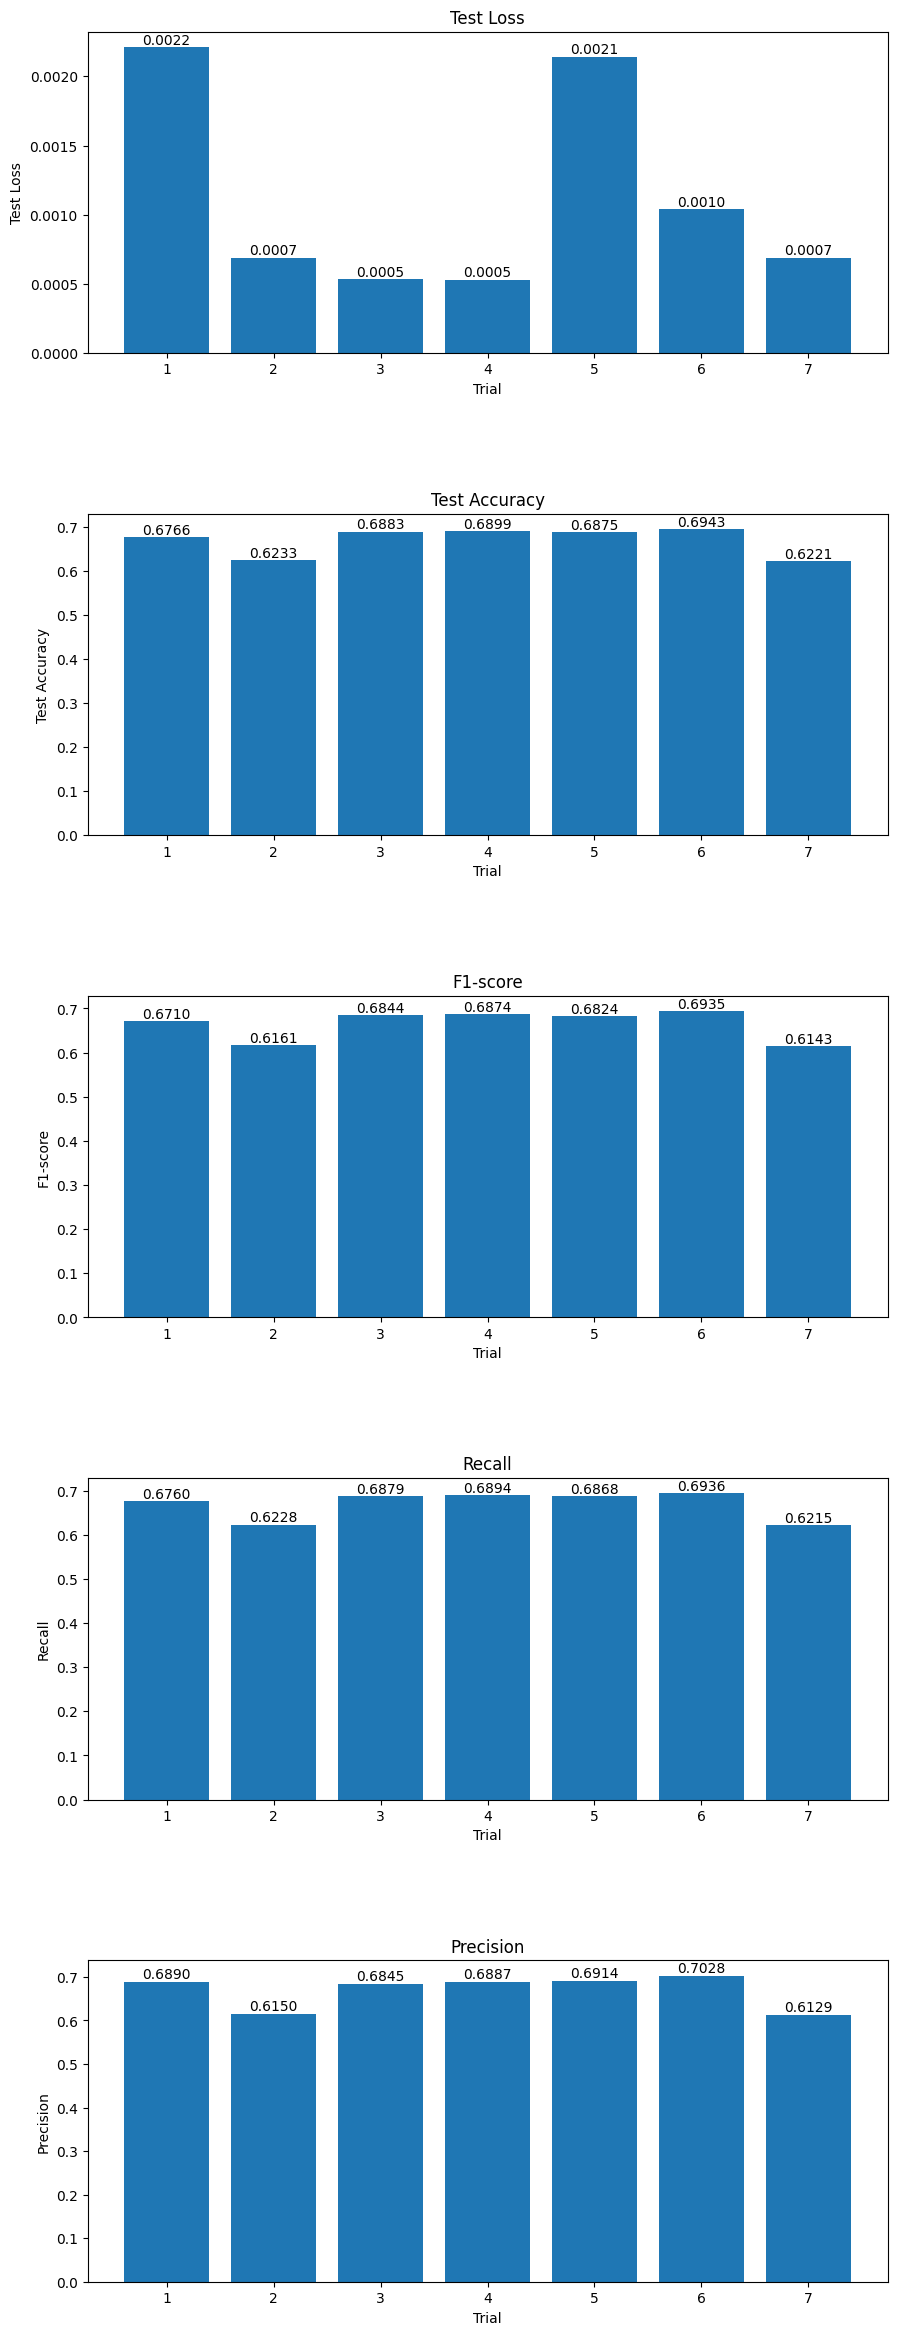

In [ ]:
# Estrai i valori per ogni metrica per i 5 trial
test_loss = data['Test Loss']
test_accuracy = data['Test Accuracy']
f1_score = data['F1-score']
recall = data['Recall']
precision = data['Precision']

# Crea un nuovo grafico con subplot per ogni metrica
fig, axs = plt.subplots(5, figsize=(10, 15))

# Aggiungi i valori di ogni metrica a ciascun subplot
for i, metric in enumerate([test_loss, test_accuracy, f1_score, recall, precision]):
    axs[i].bar(data['Trial'], metric)
    for j, val in enumerate(metric):
        axs[i].text(j + 1, val + 0.000001, f'{val:.4f}', ha='center', va='bottom')

# Aggiungi titoli e label agli assi x e y
for i, ax in enumerate(axs):
    ax.set_title(data.columns[i + 3])  # Inizia dal quarto titolo per evitare Trial, Batch Size, e Learning Rate
    ax.set_xlabel('Trial')
    ax.set_ylabel(data.columns[i + 3])  # Nome della metrica

# Imposta i margini per evitare che il bordo del grafico copra i numeri
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1.6, hspace=0.5)

plt.show()

In [ ]:
num_classes = 30  # Assicurati che il numero di classi sia lo stesso del modello originale
model3=models.resnet18(pretrained=False)
num_ftrs = model3.fc.in_features
model3.fc = torch.nn.Linear(num_ftrs, num_classes)
checkpoint3 = torch.load(root+'model_2_0.001_2000.pt')
model3.load_state_dict(checkpoint3['model_state_dict'])
model3.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#Error analysis and confusion_matrix

In [ ]:
new_test_loader =DataLoader(test_set, batch_size=128, shuffle=False, num_workers=0)

model3.eval()  # Imposta il modello in modalità valutazione
wrong_samples = []
correct_samples = []
with torch.no_grad():
    for data, target in new_test_loader:
        data, target = data.to(device), target.to(device)
        output = model3(data)
        pred = output.argmax(dim=1, keepdim=True)  # Ottiene l'indice della massima probabilità
        wrong = pred.squeeze() != target
        correct = pred.squeeze() == target
        for i in range(data.size(0)):
            if wrong[i]:
                wrong_samples.append((data[i], pred[i], target[i]))
            else:
                correct_samples.append((data[i], pred[i], target[i]))

In [ ]:
del target
gc.collect()
torch.cuda.empty_cache()

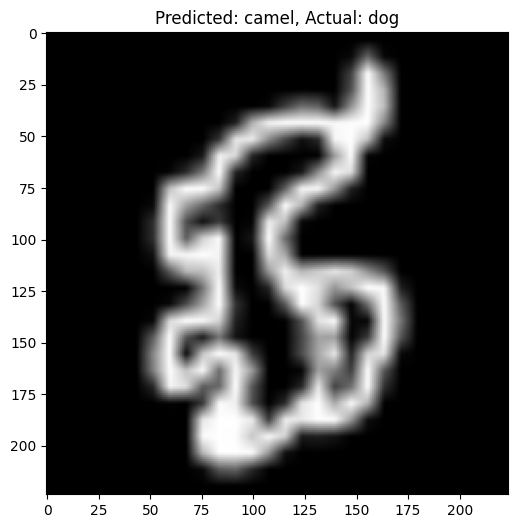

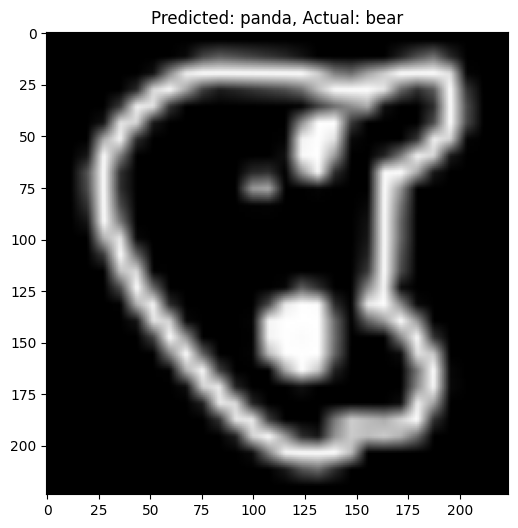

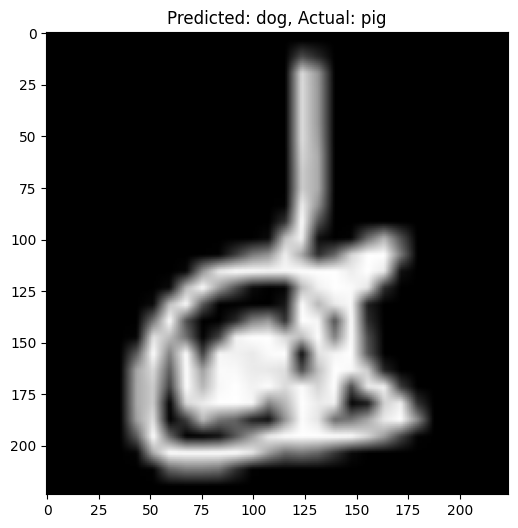

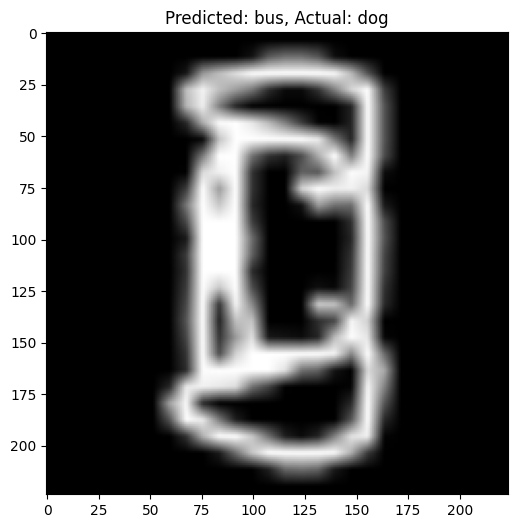

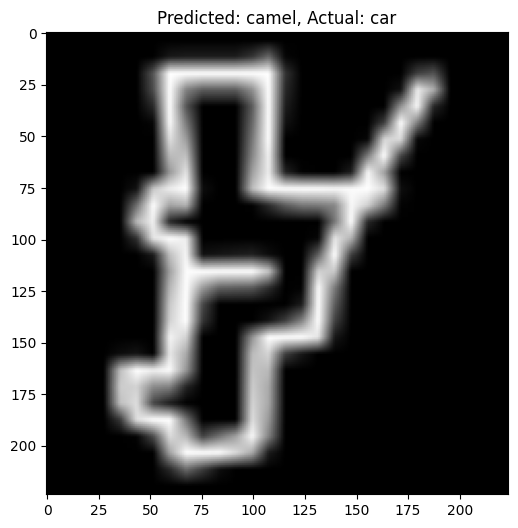

In [ ]:
def img_show(img, title):
    npimg = img.numpy()
    plt.figure(figsize=(6, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Visualizza N esempi errati
N = 5
for i, (img, pred, actual) in enumerate(wrong_samples[:N]):
    title = f'Predicted: {dataset.classi[pred.item()]}, Actual: {dataset.classi[actual.item()]}'
    img_show(torchvision.utils.make_grid(img.cpu()), title)


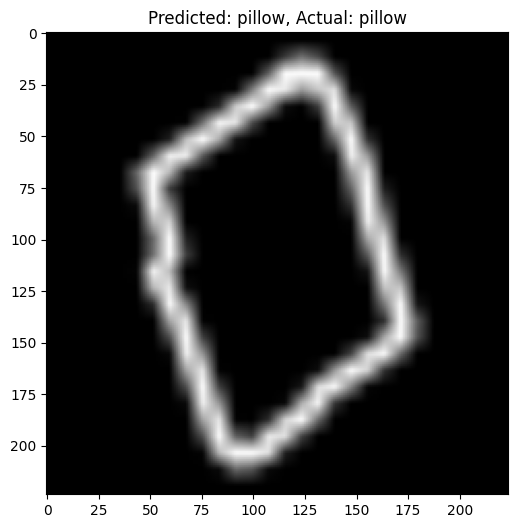

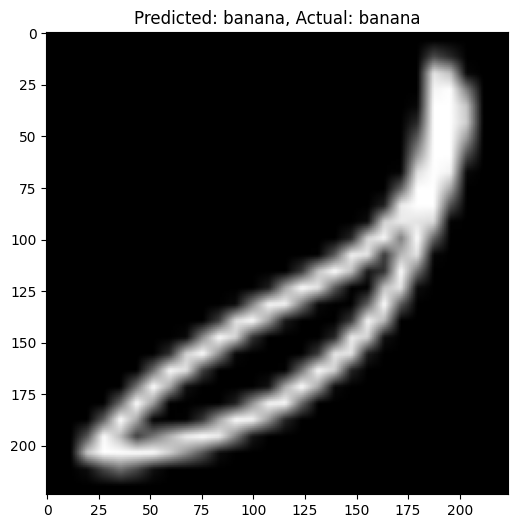

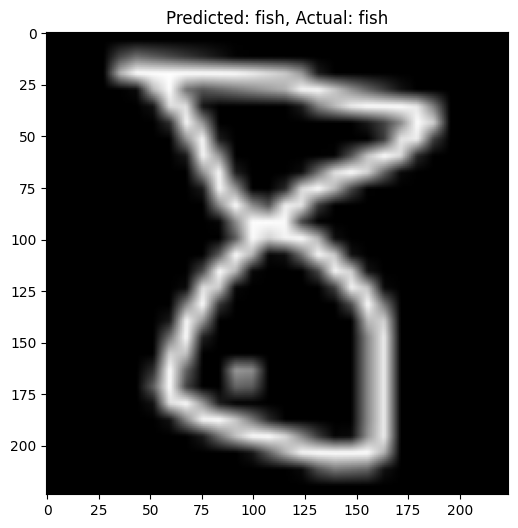

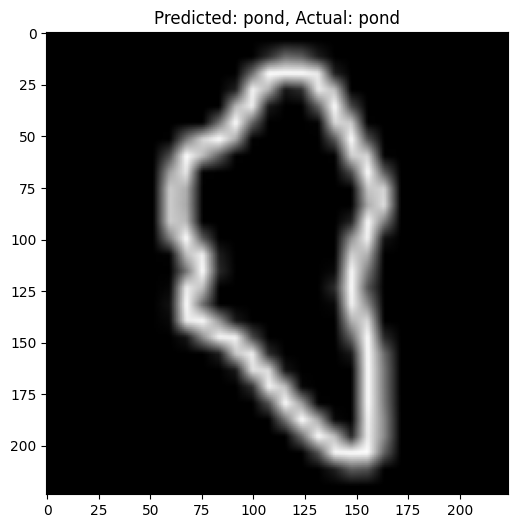

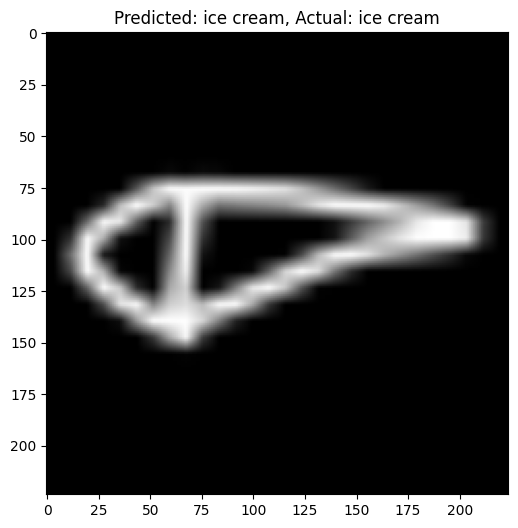

In [ ]:
def img_show(img, title):
    npimg = img.numpy()
    plt.figure(figsize=(6, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Visualizza N esempi errati
N = 5
for i, (img, pred, actual) in enumerate(correct_samples[:N]):
    title = f'Predicted: {dataset.classi[pred.item()]}, Actual: {dataset.classi[actual.item()]}'
    img_show(torchvision.utils.make_grid(img.cpu()), title)

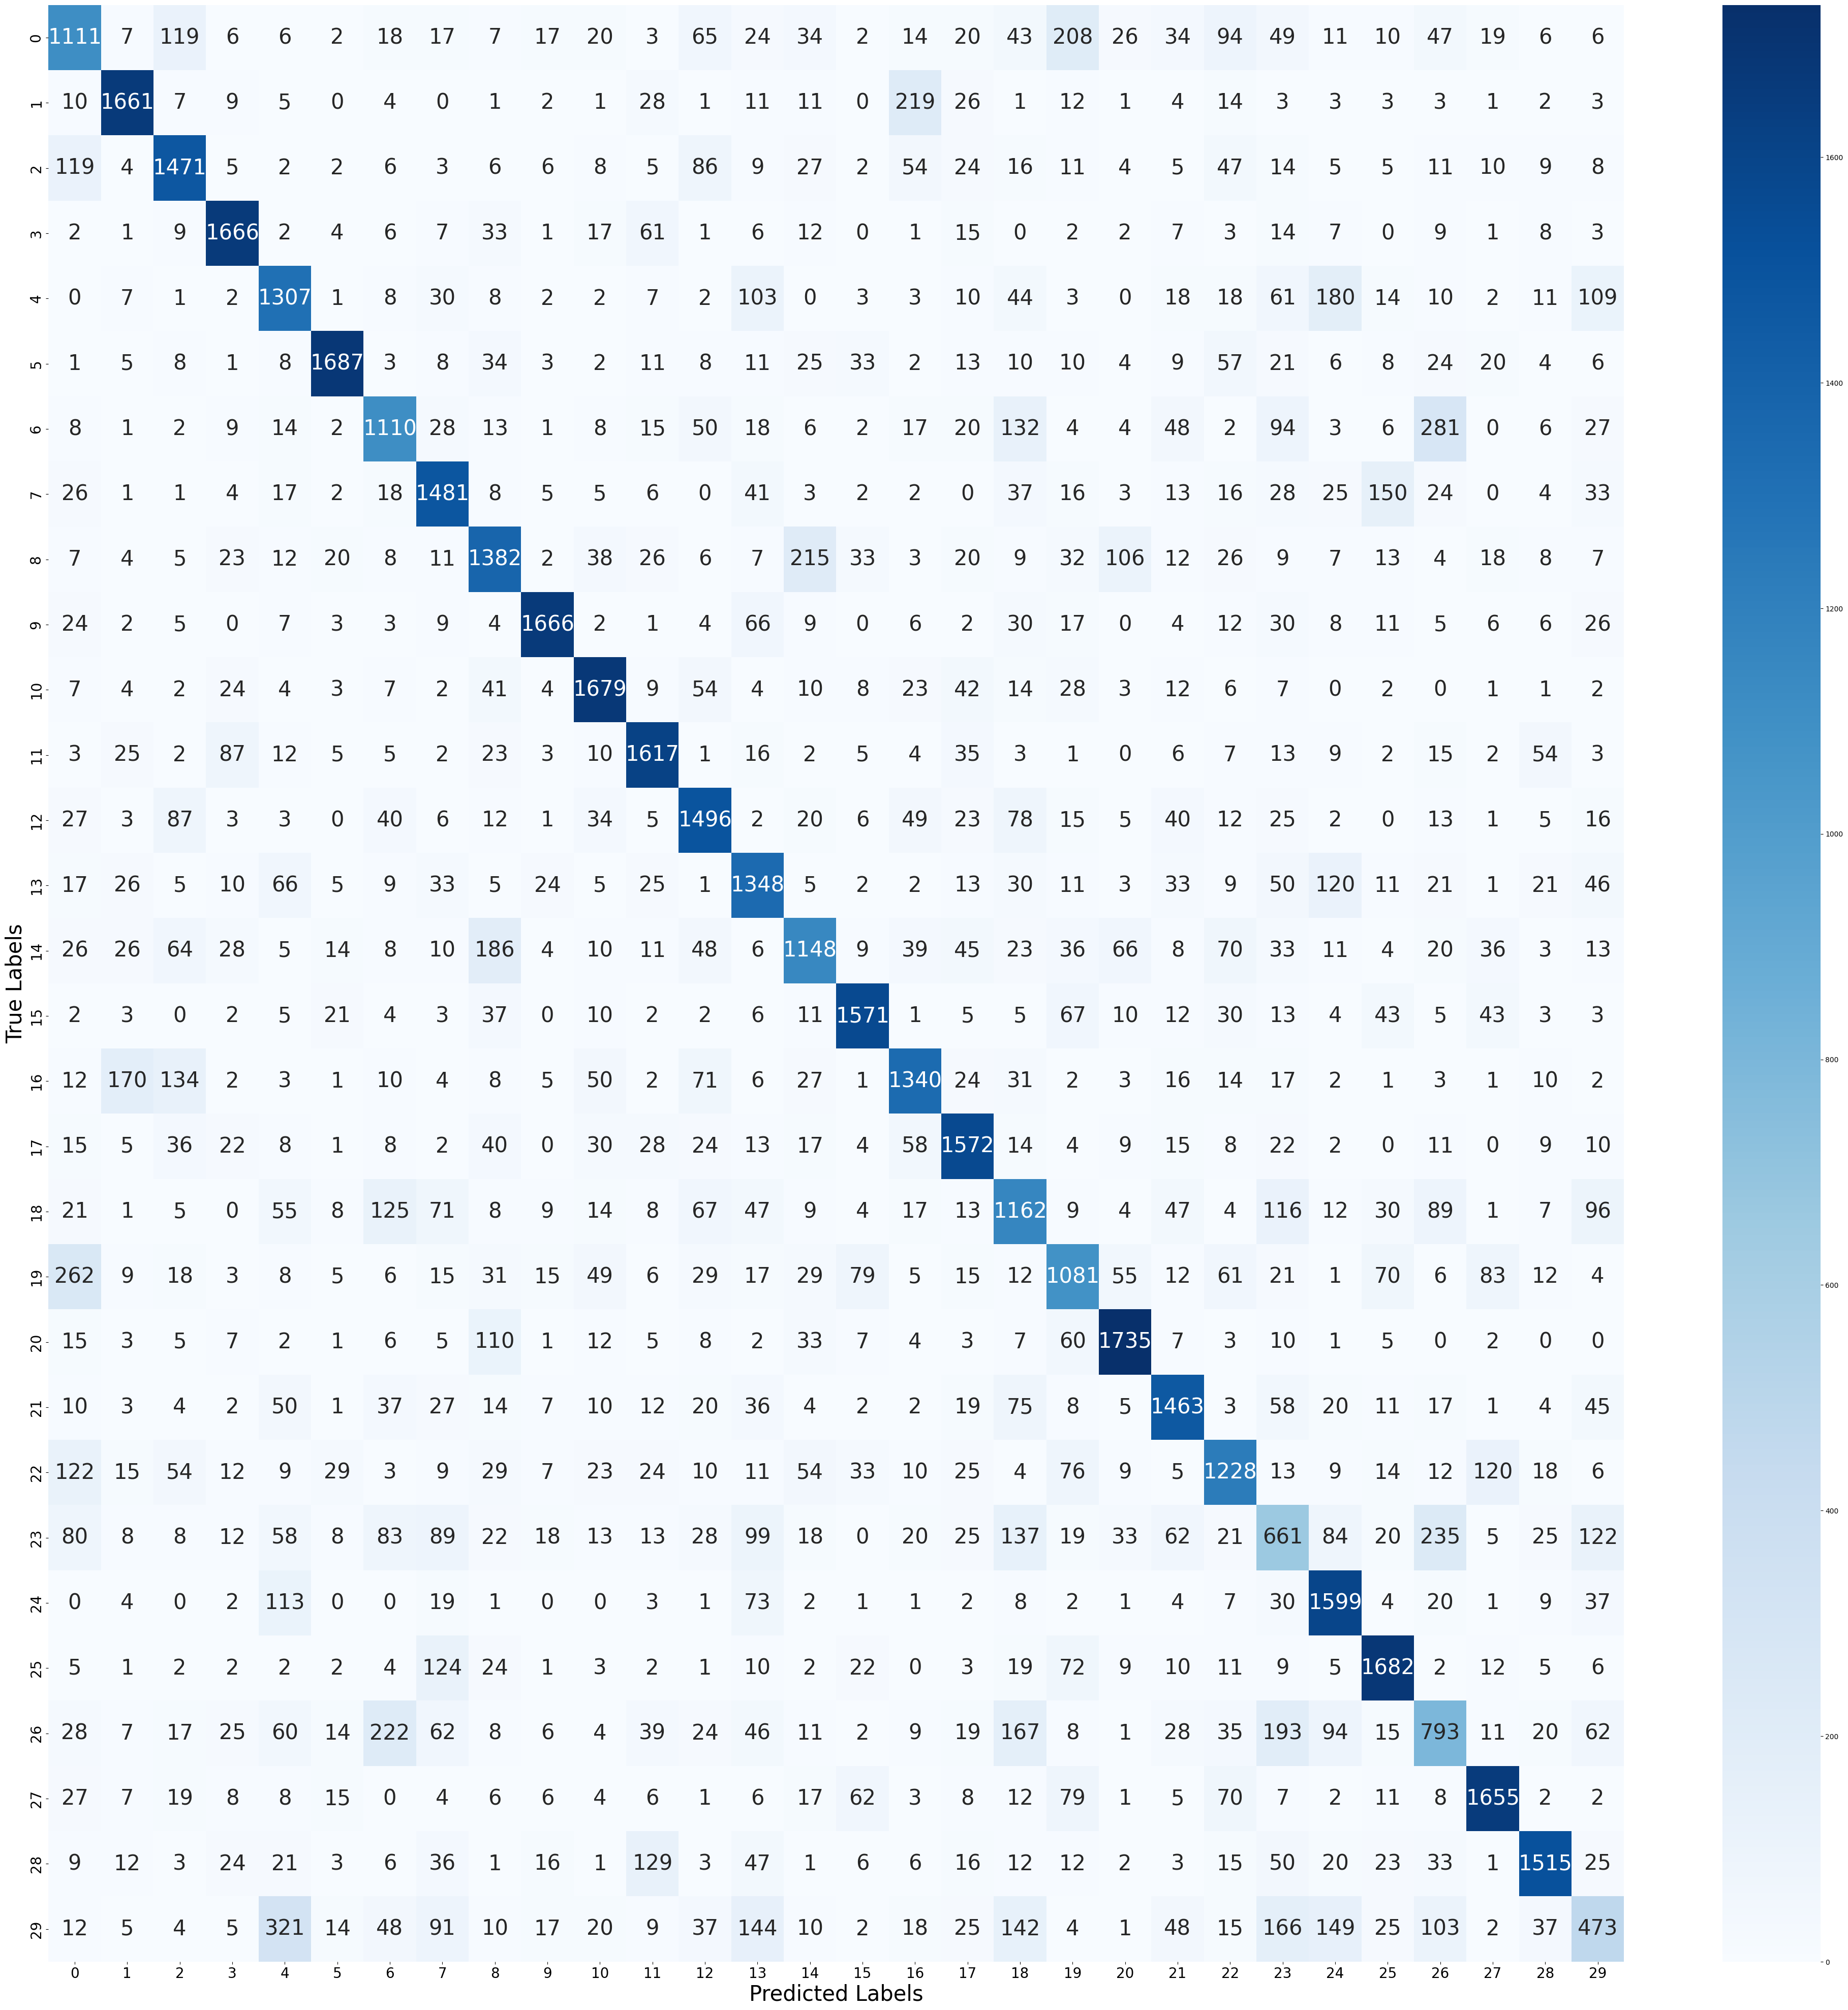

In [ ]:
from sklearn.metrics import confusion_matrix
# Estrai le previsioni errate e le corrispondenti etichette corrette
all_preds = []
all_targets = []
for _, pred, actual in wrong_samples + correct_samples:
    all_preds.append(pred.cpu().numpy())
    all_targets.append(actual.cpu().numpy())

conf_mat = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(50,50))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"fontsize": 30})
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

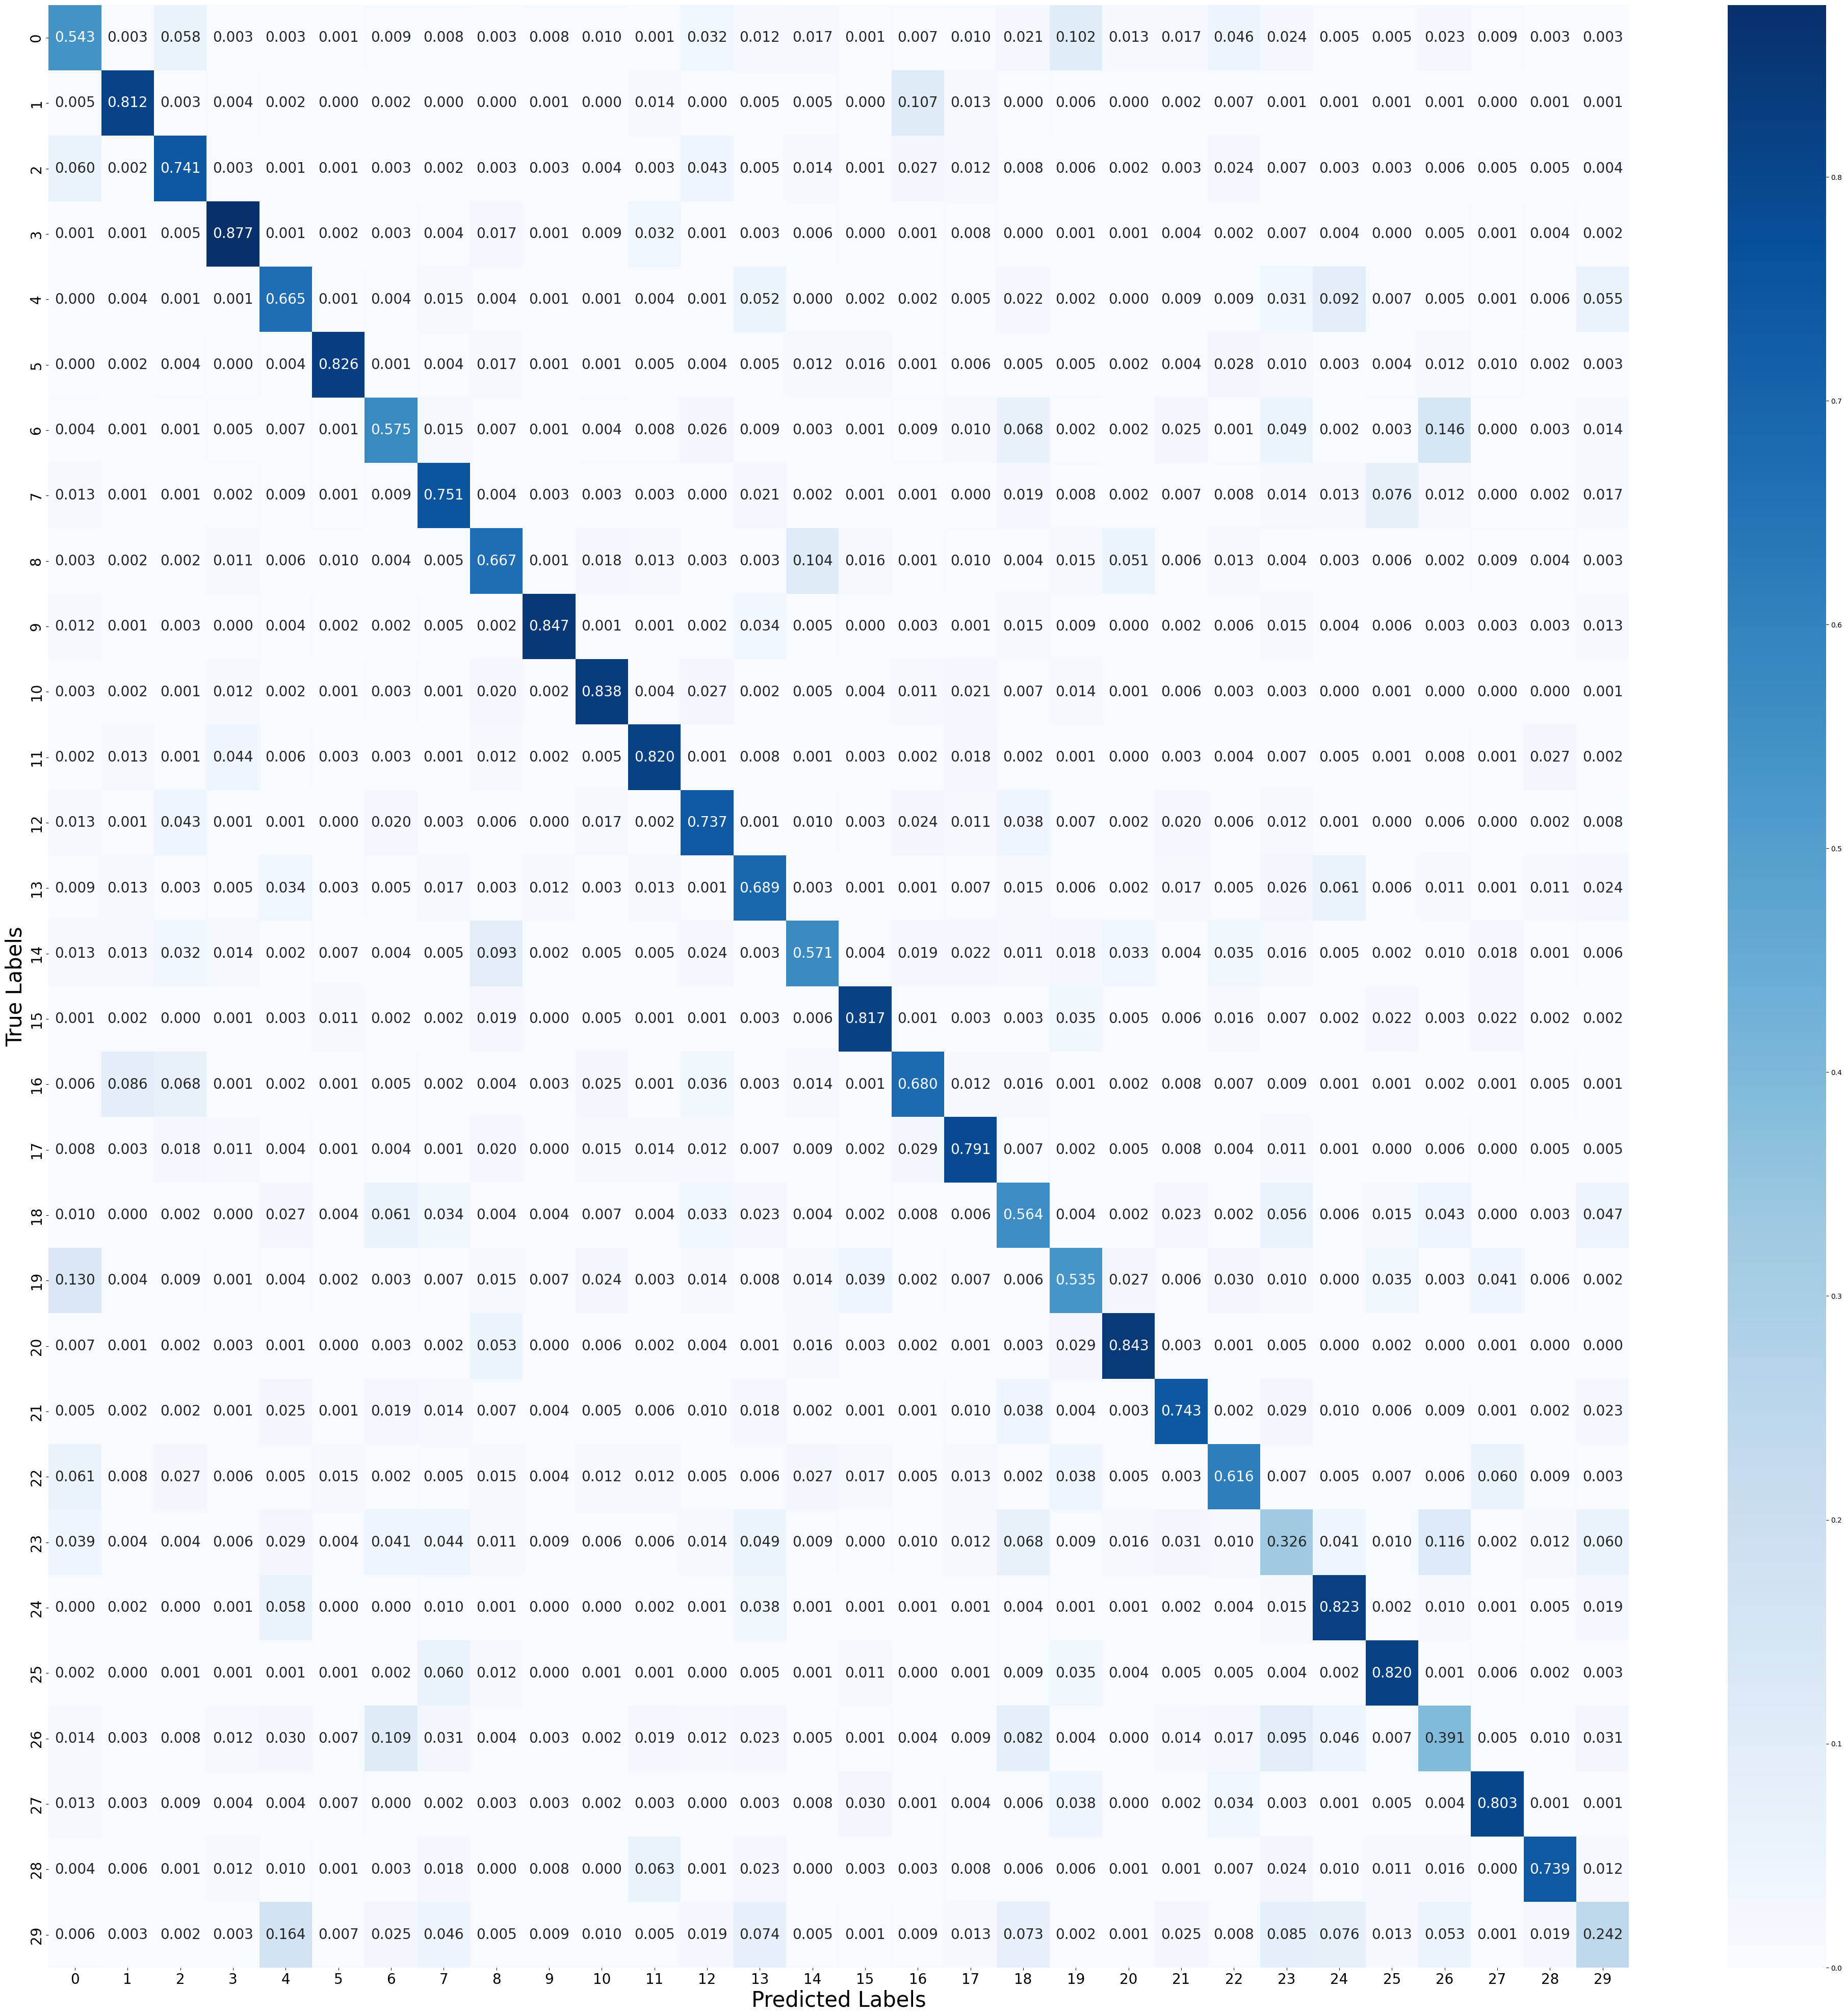

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Estrai le previsioni errate e le corrispondenti etichette corrette
all_preds = []
all_targets = []
for _, pred, actual in wrong_samples + correct_samples:
    all_preds.append(pred.cpu().numpy())
    all_targets.append(actual.cpu().numpy())

# Calcola la matrice di confusione normalizzata
conf_mat = confusion_matrix(all_targets, all_preds, normalize='true')

# Visualizza la matrice di confusione normalizzata
plt.figure(figsize=(50,50))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='.3f', annot_kws={"fontsize": 20})
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()